# Denoising Autoencoder (DAE) Tutorial

## Introduction

A Denoising Autoencoder (DAE) is a type of autoencoder that is trained to remove noise from data. The objective of a DAE is to take a noisy input and reconstruct the original, noise-free input. This makes DAEs useful for tasks such as image denoising and signal processing.

## Architecture

Similar to a basic autoencoder, a DAE consists of two main parts:
1. **Encoder**: This part of the network compresses the noisy input into a latent-space representation.
2. **Decoder**: This part of the network reconstructs the original input from the latent space representation.

### Encoder

The encoder function, $h = f(x_{noisy})$, maps the noisy input $x_{noisy}$ to a hidden representation $h$. Mathematically, this can be written as:

$$
h = f(x_{noisy}) = \sigma(Wx_{noisy} + b)
$$

where:
- $W$ is a weight matrix
- $b$ is a bias vector
- $\sigma$ is an activation function (e.g., ReLU, sigmoid)

### Decoder

The decoder function, $\hat{x} = g(h)$, maps the hidden representation $h$ back to the original input space. Mathematically, this can be written as:

$$
\hat{x} = g(h) = \sigma(W'h + b')
$$

where:
- $W'$ is a weight matrix (not necessarily the transpose of $W$)
- $b'$ is a bias vector
- $\sigma$ is an activation function

### Loss Function

The loss function measures the difference between the original input $x$ and its reconstruction $\hat{x}$. A common choice is the mean squared error (MSE):

$$
L(x, \hat{x}) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{x}_i)^2
$$

where $n$ is the number of input features.

## Training the Denoising Autoencoder

Training the DAE involves minimizing the loss function with respect to the weights and biases of the encoder and decoder. This is typically done using gradient descent.

### Derivatives

Let's derive the gradients for the encoder and decoder weights.

#### Decoder Gradients

For the decoder, the gradient of the loss function with respect to the decoder weights $W'$ is:

$$
\frac{\partial L}{\partial W'} = \frac{\partial L}{\partial \hat{x}} \cdot \frac{\partial \hat{x}}{\partial W'}
$$

Since $\hat{x} = \sigma(W'h + b')$, we have:

$$
\frac{\partial \hat{x}}{\partial W'} = h \cdot \sigma'(W'h + b')
$$

Thus,

$$
\frac{\partial L}{\partial W'} = (x - \hat{x}) \cdot \sigma'(W'h + b') \cdot h^T
$$

#### Encoder Gradients

For the encoder, the gradient of the loss function with respect to the encoder weights $W$ is:

$$
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial h} \cdot \frac{\partial h}{\partial W}
$$

Since $h = \sigma(Wx_{noisy} + b)$ and $\hat{x} = \sigma(W'h + b')$, we have:

$$
\frac{\partial L}{\partial h} = \frac{\partial L}{\partial \hat{x}} \cdot \frac{\partial \hat{x}}{\partial h} = (x - \hat{x}) \cdot \sigma'(W'h + b') \cdot W'^T
$$

And,

$$
\frac{\partial h}{\partial W} = x_{noisy} \cdot \sigma'(Wx_{noisy} + b)
$$

Thus,

$$
\frac{\partial L}{\partial W} = [(x - \hat{x}) \cdot \sigma'(W'h + b') \cdot W'^T] \cdot x_{noisy}^T \cdot \sigma'(Wx_{noisy} + b)
$$

### Gradient Descent Update

The weights and biases are updated using the gradients:

$$
W \leftarrow W - \eta \frac{\partial L}{\partial W}
$$

$$
b \leftarrow b - \eta \frac{\partial L}{\partial b}
$$

where $\eta$ is the learning rate.

## Innovations and Techniques

### Noise Injection

The key innovation in Denoising Autoencoders is the addition of noise to the input data during training. This technique forces the autoencoder to learn robust feature representations that are invariant to noise, improving the model's generalization ability.


##  Example

Let's consider a  example using Python and Keras to illustrate how a denoising autoencoder works. We'll use the MNIST dataset, which consists of 28x28 grayscale images of handwritten digits, and add noise to the images.



11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 7s 24ms/step - loss: 0.2570 - val_loss: 0.1870
Epoch 2/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1731 - val_loss: 0.1589
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1518 - val_loss: 0.1433
Epoch 4/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1399 - val_loss: 0.1343
Epoch 5/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1321 - val_loss: 0.1278
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1267 - val_loss: 0.1240
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1234 - val_loss: 0.1215
Epoch 8/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1213 - val_loss: 0.1198
Epoch 9/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1197 - val_loss: 0.1185
Epoch 10/50
235/235 [=====

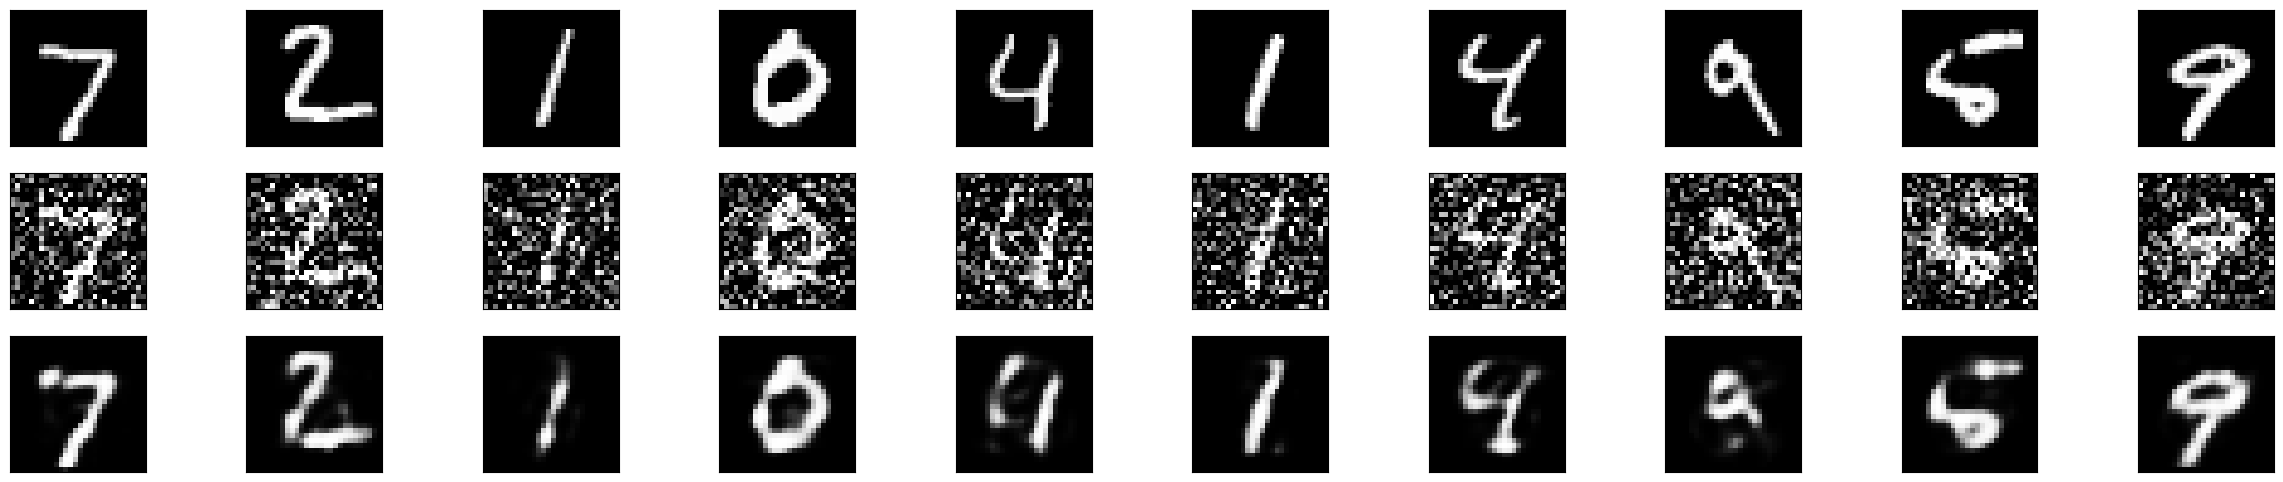

In [ ]:
### Example Data

import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Compile the autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Encode and decode some digits
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display original, noisy, and reconstructed images
import matplotlib.pyplot as plt

n = 10  # Number of digits to display
plt.figure(figsize=(30, 6))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
